<a href="https://colab.research.google.com/github/VinicyusSantos/Teste_Analytics_VinicyusSantos/blob/main/notebooks/Analise_Exploratoria_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Inicial**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_clean.csv')
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-01-01,Notebook,Eletrônicos,7.0,3500.0
1,2,2023-01-02,Camiseta,Vestuário,4.0,80.0
2,3,2023-01-02,Fogão,Eletrodomésticos,8.0,1500.0
3,4,2023-01-02,Geladeira,Eletrodomésticos,5.0,2500.0
4,5,2023-01-03,Smartphone,Eletrônicos,7.0,2000.0


In [3]:
df.tail()

,ID,Data,Produto,Categoria,Quantidade,Preço
1073,1074,2023-12-30,Sandália,Calçados,6.0,150.0
1074,1075,2023-12-30,Camiseta,Vestuário,2.0,80.0
1075,1076,2023-12-30,Notebook,Eletrônicos,1.0,3500.0
1076,1077,2023-12-30,Sandália,Calçados,5.0,150.0
1077,1078,2023-12-31,Smartphone,Eletrônicos,9.0,2000.0


In [4]:
df.shape #linhas e colunas

(1078, 6)

In [5]:
df.dtypes #tipo de cada coluna

,0
ID,int64
Data,object
Produto,object
Categoria,object
Quantidade,float64
Preço,float64


In [6]:
df.info() #resumo geral

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1078 non-null   int64  
 1   Data        1078 non-null   object 
 2   Produto     1078 non-null   object 
 3   Categoria   1078 non-null   object 
 4   Quantidade  1078 non-null   float64
 5   Preço       1078 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 50.7+ KB


In [7]:
print(df.isnull().sum())         # quantidade de nulos por coluna
print(df.duplicated().sum())     # número de duplicados

ID            0
Data          0
Produto       0
Categoria     0
Quantidade    0
Preço         0
dtype: int64
0


In [8]:
df['Quantidade'].describe()             # média, mediana, min, max, std, quartis

,Quantidade
count,1078.000000
mean,4.897959
std,2.593968
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [9]:
df['Preço'].describe()

,Preço
count,1078.000000
mean,1071.827458
std,1216.844653
min,5.000000
25%,80.000000
50%,150.000000
75%,2000.000000
max,3500.000000


# **Análise de Vendas por Tempo**

In [10]:
#Quantidade de vendas por dia
qtd_vendasdia = df.groupby('Data')['Quantidade'].sum()
qtd_vendasdia.head()

,Quantidade
Data,
2023-01-01,7.0
2023-01-02,17.0
2023-01-03,30.0
2023-01-04,4.0
2023-01-05,30.0


In [11]:
#receitas por dia
df['Receita'] = df['Quantidade'] * df['Preço']
receita_dia = df.groupby('Data')['Receita'].sum()
receita_dia.head()

,Receita
Data,
2023-01-01,24500.0
2023-01-02,24820.0
2023-01-03,40100.0
2023-01-04,480.0
2023-01-05,4560.0


# **Quantidade de Vendas por Mês**

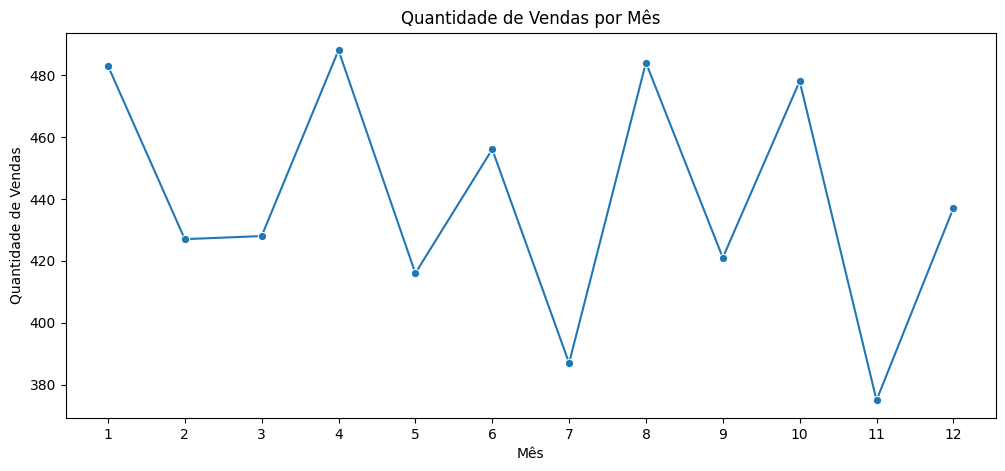

In [12]:
# Convertendo coluna data para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criar coluna com o mês
df['Mês'] = df['Data'].dt.month

# Agrupar por mês e somar a quantidade
vendas_por_mes = df.groupby('Mês')['Quantidade'].sum().reset_index()

# Plotar
plt.figure(figsize=(12,5))
sns.lineplot(x='Mês', y='Quantidade', data=vendas_por_mes, marker='o')
plt.title("Quantidade de Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Vendas")
plt.xticks(range(1,13))  # meses de 1 a 12
plt.show()

In [13]:
#criação de uma time serie para visualização de decomposição
ts = df.groupby('Data')['Quantidade'].sum()
ts.head()

,Quantidade
Data,
2023-01-01,7.0
2023-01-02,17.0
2023-01-03,30.0
2023-01-04,4.0
2023-01-05,30.0


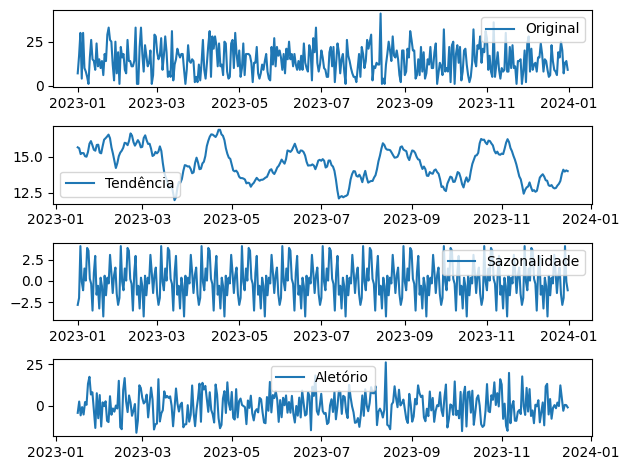

In [14]:
#aplicando decomposição e extraindo tendencia, sazonalidade e erro
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(ts, period=30)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()

# **Receita por mês**

In [15]:
#receita por mes
df['Mês'] = df['Data'].dt.month
df.groupby('Mês')['Receita'].sum()

,Receita
Mês,
1,299435.0
2,265310.0
3,227035.0
4,116595.0
5,248375.0
6,897590.0
7,647995.0
8,718375.0
9,606190.0


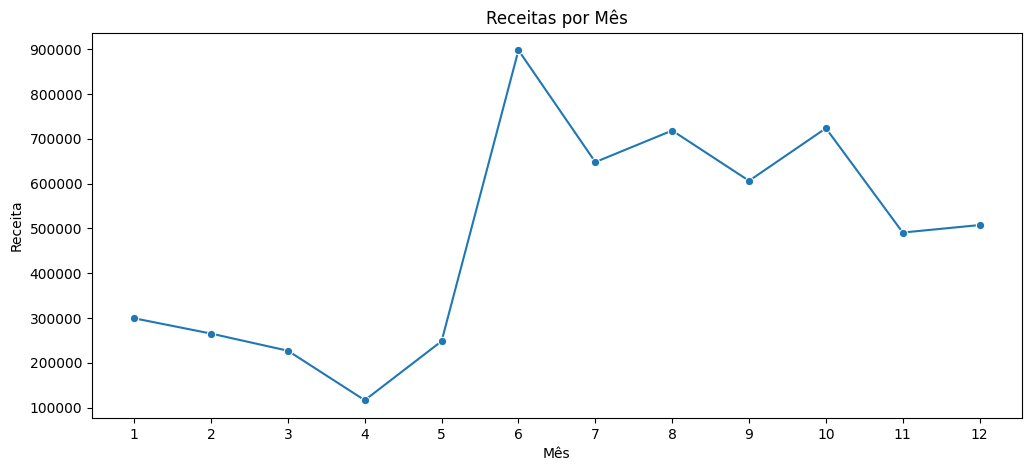

In [16]:
# Agrupar por mês e somar a quantidade
receitas_por_mes = df.groupby('Mês')['Receita'].sum().reset_index()

# Plotar
plt.figure(figsize=(12,5))
sns.lineplot(x='Mês', y='Receita', data=receitas_por_mes, marker='o')
plt.title("Receitas por Mês")
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.xticks(range(1,13))  # meses de 1 a 12
plt.show()

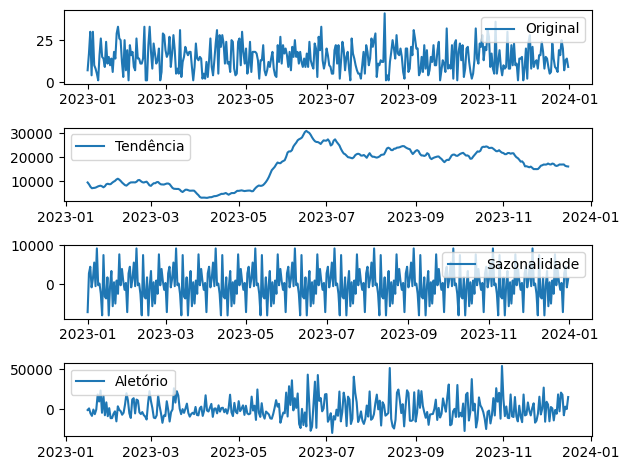

In [17]:
#criação de uma time serie para visualização de decomposição
ts1 = df.groupby('Data')['Receita'].sum()

decomposicao = seasonal_decompose(ts1, period=30)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()

# **Análise por Produto / Categoria**

In [18]:
#total de produtos vendidos por categoria
total_produtos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
total_produtos

,Quantidade
Produto,
Smartphone,641.0
Caneta,626.0
Geladeira,579.0
Camiseta,577.0
Fogão,559.0
Livro,544.0
Notebook,539.0
Calça,494.0
Sandália,386.0


Text(0, 0.5, 'Quantidade de Vendas')

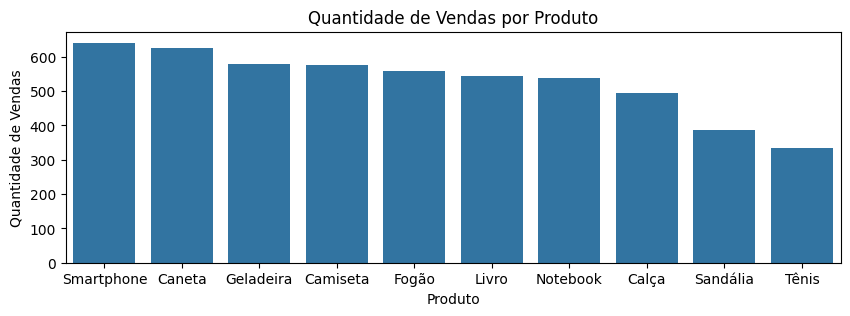

In [19]:
plt.figure(figsize=(10,3))
sns.barplot(x=total_produtos.index, y=total_produtos.values)
plt.title("Quantidade de Vendas por Produto")
plt.xlabel("Produto")
plt.ylabel("Quantidade de Vendas")

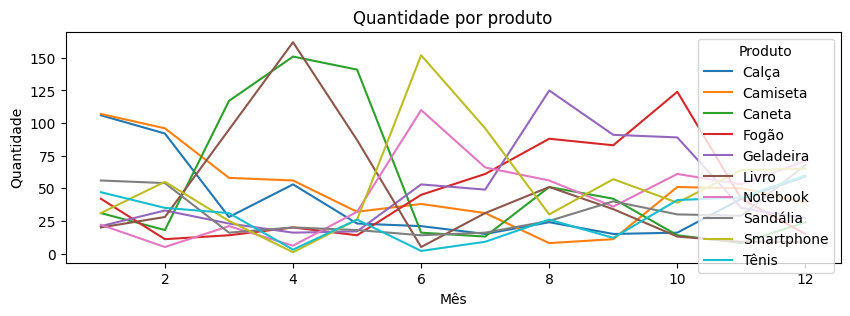

In [20]:
quantidade_vendida_por_produto_mes = df.groupby(['Produto', 'Mês'])['Quantidade'].sum().reset_index()
#Gráfico de linhas da produção ao longo do tempo por produto.
plt.figure(figsize=(10, 3))
sns.lineplot(x='Mês', y='Quantidade', hue='Produto', data=quantidade_vendida_por_produto_mes, errorbar=None).set_title('Quantidade por produto')
plt.show()

In [21]:
#total de vendas por categoria
total_categoria = df.groupby('Categoria')['Quantidade'].sum()
total_categoria

,Quantidade
Categoria,
Calçados,721.0
Eletrodomésticos,1138.0
Eletrônicos,1180.0
Papelaria,1170.0
Vestuário,1071.0


Text(0, 0.5, 'Quantidade de Vendas')

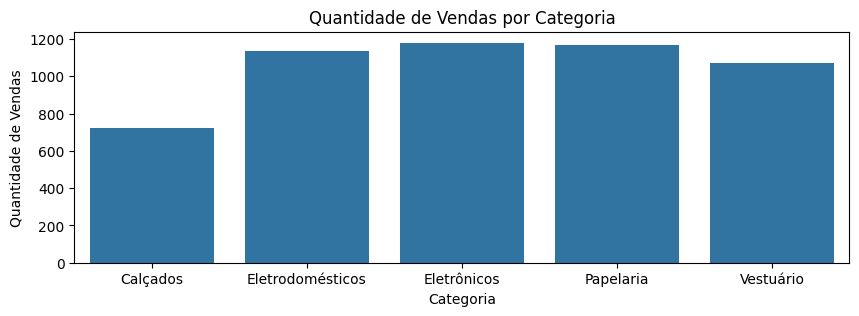

In [22]:
plt.figure(figsize=(10,3))
sns.barplot(x=total_categoria.index, y=total_categoria.values)
plt.title("Quantidade de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Quantidade de Vendas")

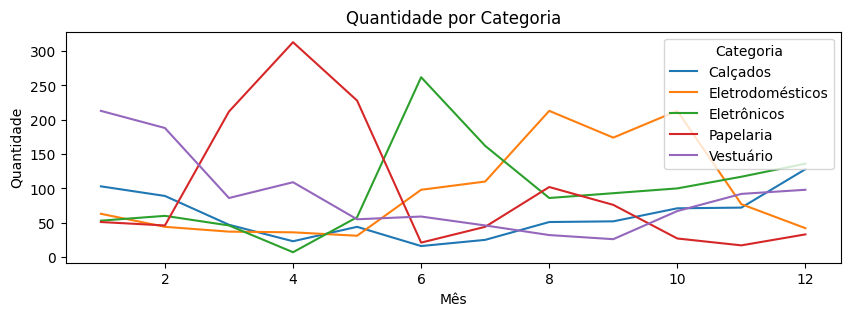

In [23]:
quantidade_vendida_por_categoria_mes = df.groupby(['Categoria', 'Mês'])['Quantidade'].sum().reset_index()
#Gráfico de linhas da produção ao longo do tempo por produto.
plt.figure(figsize=(10, 3))
sns.lineplot(x='Mês', y='Quantidade', hue='Categoria', data=quantidade_vendida_por_categoria_mes, errorbar=None).set_title('Quantidade por Categoria')
plt.show()

In [24]:
#receita total por produto
receita_produto = df.groupby('Produto')['Receita'].sum().sort_values(ascending=False)
receita_produto

,Receita
Produto,
Notebook,1886500.0
Geladeira,1447500.0
Smartphone,1282000.0
Fogão,838500.0
Tênis,100500.0
Calça,59280.0
Sandália,57900.0
Camiseta,46160.0
Livro,27200.0


Text(0, 0.5, 'Receita')

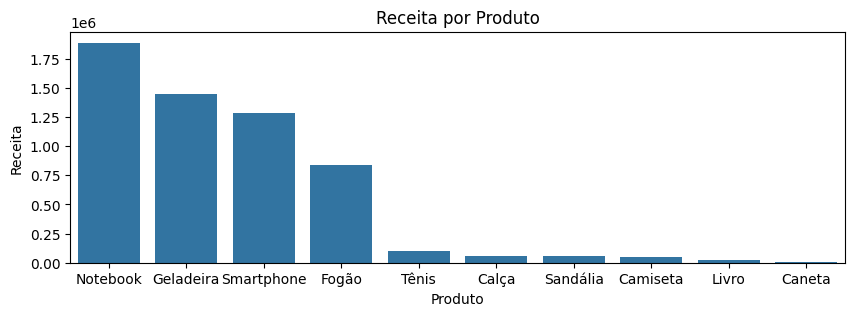

In [25]:
#receita por produto
plt.figure(figsize=(10,3))
sns.barplot(x=receita_produto.index, y=receita_produto.values)
plt.title("Receita por Produto")
plt.xlabel("Produto")
plt.ylabel("Receita")

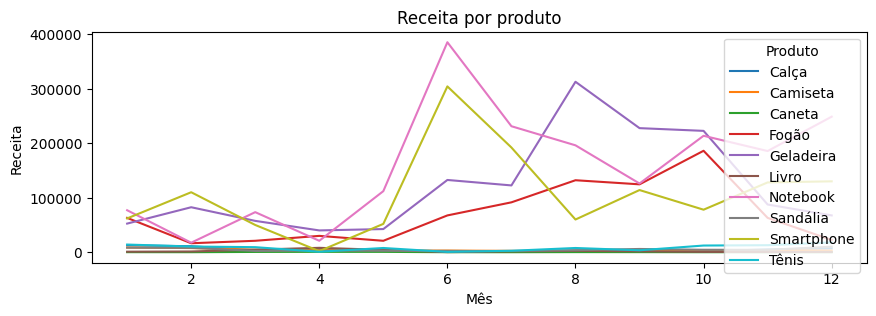

In [26]:
receita_por_produto_mes = df.groupby(['Produto', 'Mês'])['Receita'].sum().reset_index()
#Gráfico de linhas da produção ao longo do tempo por produto.
plt.figure(figsize=(10, 3))
sns.lineplot(x='Mês', y='Receita', hue='Produto', data=receita_por_produto_mes, errorbar=None).set_title('Receita por produto')
plt.show()

In [27]:
#receita total por categoria
receita_categoria = df.groupby('Categoria')['Receita'].sum()
receita_categoria

,Receita
Categoria,
Calçados,158400.0
Eletrodomésticos,2286000.0
Eletrônicos,3168500.0
Papelaria,30330.0
Vestuário,105440.0


Text(0, 0.5, 'Receita')

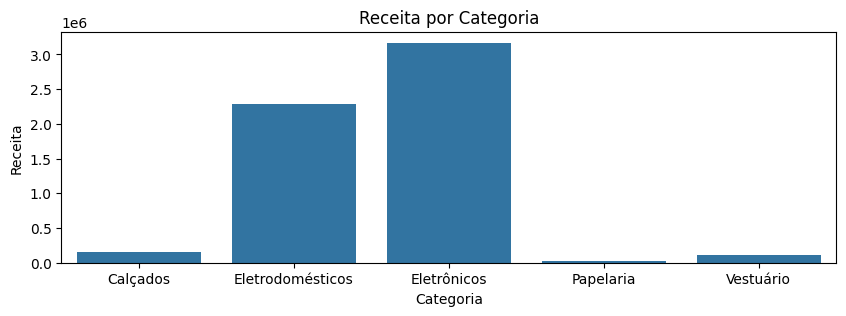

In [28]:
plt.figure(figsize=(10,3))
sns.barplot(x=receita_categoria.index, y=receita_categoria.values)
plt.title("Receita por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Receita")

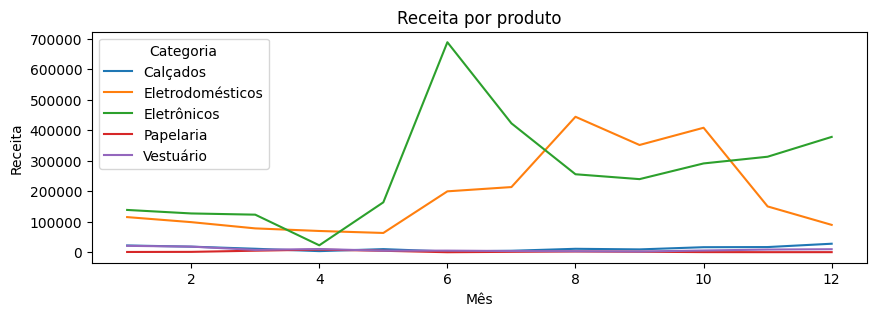

In [29]:
receita_por_categoria_mes = df.groupby(['Categoria', 'Mês'])['Receita'].sum().reset_index()
#Gráfico de linhas da produção ao longo do tempo por produto.
plt.figure(figsize=(10, 3))
sns.lineplot(x='Mês', y='Receita', hue='Categoria', data=receita_por_categoria_mes, errorbar=None).set_title('Receita por produto')
plt.show()

# **Outliers**

<Axes: xlabel='Categoria', ylabel='Quantidade'>

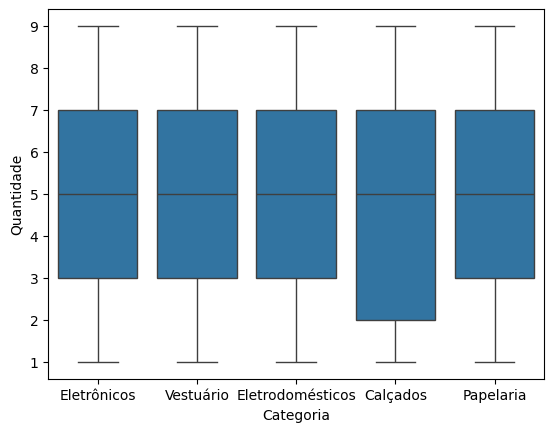

In [30]:
sns.boxplot(x='Categoria', y='Quantidade', data=df)

# **Padrões / Insigths**

**Produtos que mais geram receita:**
1.   Notebook: 1.886.500
2.   Geladeira: 1.447.500
3.   Smartphone: 1.282.000
4.   Fogão: 838.500
5.   Tênis: 100.500
6.   Calça: 59.280
7.   Sandália: 57.900
8.   Camiseta: 46.160
9.   Livro: 27.200
10.  Caneta: 3130

**Produtos mais vendidos (unidade)**
1.   Smartphone: 641
2.   Caneta: 626
3.   Geladeira: 579
4.   Camiseta: 577
5.   Fogão: 559
6.   Livro: 544
7.   Notebook: 539
8.   Calça: 494
9.   Sandália: 386
10.  Tênis: 335

**Categorias com maior participação.(Unidades vendidas)**
1. Calçados:	721.0
2. Eletrodomésticos:	1138.0
3. Eletrônicos:	1180.0
4. Papelaria:	1170.0
5. Vestuário:	1071.0

**Meses de pico e baixa vendas(Unidades).**
*   Pico nos meses(acima de 460UND): 1, 4, 8, 10
*   Baixa nos meses(abaixo de 400UND): 7, 11

**Meses de pico e baixa receitas.**
*   Pico nos meses(>= 500k): 6, 7, 8, 9, 10, 11, 12
*   Baixa nos meses(< 500k): 1, 2, 3, 4, 5

**Têndencias / Sazonalidade**
*   Tendencia de crescimento nas receitas
*   Sazonalidade nos meses: 1, 4, 6, 8, 10








